In [47]:
import pandas as pd

/tmp/ipykernel_2285318/2761588643.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, df])


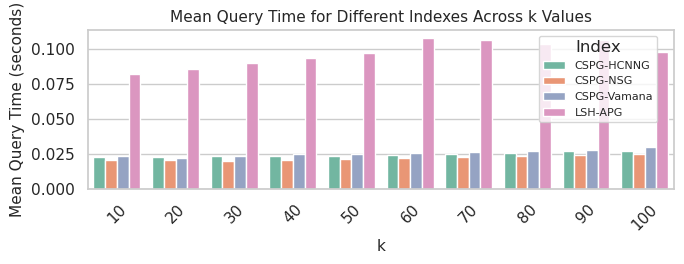

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

indices = {
    'CSPG-HNSW': 'audio5w_hnsw_cspg_2.csv',
    'CSPG-HCNNG': 'audio5w_hcnng_cspg_2.csv',
    'CSPG-NSG': 'audio5w_nsg_cspg_2.csv',
    'CSPG-Vamana': 'audio5w_vamana_cspg_2.csv',
    'LSH-APG': 'audio5w_lsh_apg.csv'
}

all_data = pd.DataFrame()

for index, file in indices.items():

  df = pd.read_csv(file)
  df = df[df['k'].between(10, 100)]
  df = df[['k', 'query_time']]
  df['Index'] = index
  if index == 'LSH-APG':
    df['query_time'] = df['query_time'] / 1000 * 200
  all_data = pd.concat([all_data, df])



mean_data = all_data.groupby(['k', 'Index'])['query_time'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(7, 2.8))

sns.barplot(x='k', y='query_time', hue='Index', data=mean_data, palette='Set2')

plt.title('Mean Query Time for Different Indexes Across k Values', fontsize=11)
plt.xlabel('k', fontsize=11)
plt.ylabel('Mean Query Time (seconds)', fontsize=11)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Index', bbox_to_anchor=(0.76, 1), loc='upper left', fontsize=8)

plt.subplots_adjust(bottom=0.3)

plt.savefig('audio5w_querytime_barplot.png', dpi=300)
plt.savefig('audio5w_querytime_barplot.svg', dpi=300)
plt.tight_layout()
plt.show()